In [59]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1

#### the original dataset is 760 rows but we decided on using the first 200
#### below is the code that belongs to Task 1

In [91]:
# TASK 1
data = pd.read_excel(r'C:\Users\Mohammed\Documents\ENDG319\CURE2\Diabetes.xlsx')
Data_used = data.iloc[0:200, :]
df = pd.DataFrame(Data_used, columns= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

In [92]:
#Separating the attributes and targets or classes
#let's define the variables dfX and sy from df to hold the attributes and labels. 
dfX = df.drop(columns = ['Outcome'])
sy = df.Outcome

In [93]:
#Now split dfX into a training set(X_train) and a test set(X_test)
# and sy into a training set(sy_train) and a test set(sy_test).
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test= train_test_split(dfX,sy)

In [94]:
dfX_train, dfX_test, sy_train, sy_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 133            8       84             74             31        0  38.3   
 99             1      122             90             51      220  49.7   
 84             5      137            108              0        0  48.8   
 119            4       99             76             15       51  23.2   
 151            4      114             65              0        0  21.9   
 ..           ...      ...            ...            ...      ...   ...   
 122            2      107             74             30      100  33.6   
 176            6       85             78              0        0  31.2   
 107            4      144             58             28      140  29.5   
 24            11      143             94             33      146  36.6   
 43             9      171            110             24      240  45.4   
 
      DiabetesPedigreeFunction  Age  
 133                     0.457   39  
 99                   

In [95]:
# Data preprocessing.
from sklearn import preprocessing
#define the label encoder
le = preprocessing.LabelEncoder()

In [96]:
# fit the label encoder
le = le.fit(sy_train)
le.classes_

array([0, 1], dtype=int64)

In [98]:
#transform labels into numbers
y_train = le.transform(sy_train)
sy_train, y_train

(133    0
 99     1
 84     1
 119    0
 151    0
       ..
 122    0
 176    0
 107    0
 24     1
 43     1
 Name: Outcome, Length: 150, dtype: int64,
 array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64))

In [99]:
#Preprocessing attributes with MinMaxscaler()
dfX_train.to_numpy()

array([[  8.   ,  84.   ,  74.   , ...,  38.3  ,   0.457,  39.   ],
       [  1.   , 122.   ,  90.   , ...,  49.7  ,   0.325,  31.   ],
       [  5.   , 137.   , 108.   , ...,  48.8  ,   0.227,  37.   ],
       ...,
       [  4.   , 144.   ,  58.   , ...,  29.5  ,   0.287,  37.   ],
       [ 11.   , 143.   ,  94.   , ...,  36.6  ,   0.254,  51.   ],
       [  9.   , 171.   , 110.   , ...,  45.4  ,   0.721,  54.   ]])

In [100]:
#Create an array X with normalized attribute values.
# define preprocessing tool
nl = preprocessing.MinMaxScaler()
#fit
nl = nl.fit(dfX_train.to_numpy())
# Apply to transform
X_train = nl.transform(dfX_train.to_numpy())
X_train

array([[0.47058824, 0.42857143, 0.60655738, ..., 0.71992481, 0.20619127,
        0.375     ],
       [0.05882353, 0.62244898, 0.73770492, ..., 0.93421053, 0.13322278,
        0.20833333],
       [0.29411765, 0.69897959, 0.8852459 , ..., 0.91729323, 0.0790492 ,
        0.33333333],
       ...,
       [0.23529412, 0.73469388, 0.47540984, ..., 0.55451128, 0.11221669,
        0.33333333],
       [0.64705882, 0.72959184, 0.7704918 , ..., 0.68796992, 0.09397457,
        0.625     ],
       [0.52941176, 0.87244898, 0.90163934, ..., 0.85338346, 0.35212825,
        0.6875    ]])

In [101]:
#Import
from sklearn.neighbors import KNeighborsClassifier
# define
knn = KNeighborsClassifier(n_neighbors = 1)
# fit
knn = knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=1)

In [103]:
# preprocess the datasets dfX_test and sy_test
y_test = le.transform(sy_test.to_numpy())

In [104]:
X_test = nl.transform(dfX_test.to_numpy())

In [105]:
# predict the class
knn.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [107]:
#fraction of instances correctly predicted
knn.score(X_test, y_test)

0.64

In [108]:
knn.score(X_train, y_train)

1.0

## Task 2

#### we used a loop to try every k value from 1 to 149 since our training set is of size 150

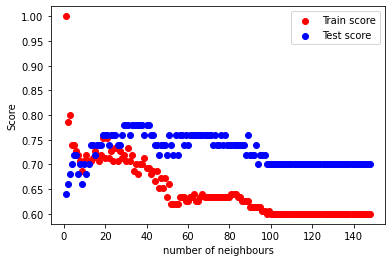

In [76]:

Min_Max_accuracy_X = []
Min_Max_accuracy_Y = []
Min_Max_accuracy_Y_train = [] 

#since we are using 150 training rows we will try k values from 1 to 149
i = 1 
while i<149:
    Min_Max_accuracy_X.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train,y_train)
    Min_Max_accuracy_Y.append(knn.score(X_test, y_test)) #this adds the accuraccy of a given number of neighbours
    Min_Max_accuracy_Y_train.append(knn.score(X_train, y_train))

    i += 1
    
fig, ax = plt.subplots()
X_minmax = np.array(Min_Max_accuracy_X)
Y_minmax = np.array(Min_Max_accuracy_Y)
Y_minmax_train = np.array(Min_Max_accuracy_Y_train)

ax.scatter(X_minmax, Y_minmax_train, c='r', label='Train score')
ax.scatter(X_minmax, Y_minmax, c='b', label='Test score')


plt.xlabel("number of neighbours")
plt.ylabel("Score")
plt.legend()
plt.show()


#### The next segment uses numpy functions to locate the most accurate number of neighbours to use for the highest test set score

In [77]:
best_accuracy = np.amax(Y_minmax) #ths shows best test scores ignoring training score
index_best = np.where(Y_minmax==best_accuracy)
index_best, best_accuracy #please note that a given index is 1 less than the actual number of neighbours used

((array([28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40], dtype=int64),), 0.78)

#### please dont mind the different values used in the index as each fresh run for the code changes both the max value and which number of neighbours is best to use

In [78]:
X_minmax[16], Y_minmax_train[16], Y_minmax[16]

(17, 0.7066666666666667, 0.74)

In [79]:
X_minmax[18], Y_minmax_train[18], Y_minmax[18]

(19, 0.7533333333333333, 0.76)

## Task 2b

#### we used the second method in the lecture to obtain the standard scaler processed values

In [80]:
stand = preprocessing.StandardScaler()
standfitted = stand.fit(dfX_train.to_numpy())
X_train_p = (dfX_train - dfX_train.mean())/ (dfX_train.std(ddof=1))
X_test_p = (dfX_test - dfX_test.mean())/ (dfX_test.std(ddof=1))

knn = KNeighborsClassifier(n_neighbors = 1)
knn = knn.fit(X_train_p, y_train)
knn.score(X_test_p, y_test)


0.6

### We used a loop to try every k value from 1 to 149 since our training set is of size 150

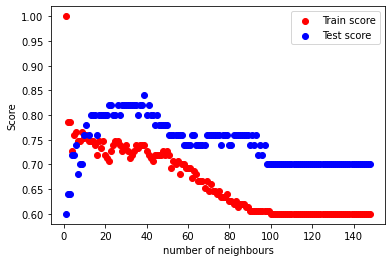

In [81]:
Stan_scale_accuracy_X = []
Stan_scale_accuracy_Y = []
Stan_scale_accuracy_Y_train = [] 

#since we are using 150 training rows we will try k values from 1 to 149
i = 1 
while i<149:
    Stan_scale_accuracy_X.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train_p, y_train)
    Stan_scale_accuracy_Y.append(knn.score(X_test_p, y_test)) #this adds the accuraccy of a given number of neighbours
    Stan_scale_accuracy_Y_train.append(knn.score(X_train_p, y_train))
    i += 1
    
fig, ax = plt.subplots()
X_stan = np.array(Stan_scale_accuracy_X)
Y_stan = np.array(Stan_scale_accuracy_Y)
Y_stan_train = np.array(Stan_scale_accuracy_Y_train)

ax.scatter(X_stan, Y_stan_train, c='r', label='Train score')
ax.scatter(X_stan, Y_stan, c='b', label='Test score')


plt.xlabel("number of neighbours")
plt.ylabel("Score")
plt.legend()
plt.show()

### The next segment uses numpy functions to locate the most accurate number of neighbours to use for the highest test set score

In [82]:
best_accuracy = np.amax(Y_stan) #ths shows best test scores ignoring training score
index_best = np.where(Y_stan==best_accuracy)
index_best, best_accuracy #please note that a given index is 1 less than the actual number of neighbours used

((array([38], dtype=int64),), 0.84)

#### please dont mind the different values used in the index as each fresh run for the code changes both the max value and which number of neighbours is best to use

In [88]:
X_stan[38], Y_stan_train[38], Y_stan[38]

(39, 0.74, 0.84)

# Task 3 

### Because Standard scaling has a significantly higher test set score ,  we will use Standard scaling

#### we will choose the value with index 38 because of its higher training score compared to other k values with a maximum test score

### meaning our best value for k is 39, with  a training score of 0.74 and a test score of 0.84

# Task 3b

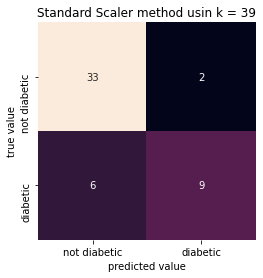

In [90]:
#confusion matrix

knn = KNeighborsClassifier(n_neighbors = 39)
knn = knn.fit(X_train_p, y_train)

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, knn.predict(X_test_p))


labels = ['not diabetic', 'diabetic']

sns.heatmap(mat, square=True, annot=True, cbar=False, 
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Standard Scaler method usin k = 39');

#### There are 2 cases where the classifier says diabetic, but these patients are not diabetic. These are false positives - we diagnose Diabetes when there is none.

#### There are 6 cases where the classifier says not diabetic, but these patients are diabetic. These are false negatives - we do not diagnose Diabetes when there actually is.


# Task 4

#### we wanted to test 2 new instances so we used a loop to apply the standard scaling to the attributes of those 2 nstances before plugging them in the model

In [86]:
new_example_rawdata =[[6, 119, 50, 22, 176, 27.1, 1.318, 33], [2, 146, 76, 35, 194, 38.2, 0.329, 29
]]
new_numpy = np.array(new_example_rawdata)
X_new = []
i = 0
while i < 2:
    X_new.append((new_numpy[i] - dfX_test.mean())/ (dfX_test.std(ddof=1)))
    i += 1

[Pregnancies                 0.593732
 Glucose                    -0.003148
 BloodPressure              -0.881419
 SkinThickness              -0.025275
 Insulin                     0.732652
 BMI                        -0.582508
 DiabetesPedigreeFunction    2.680944
 Age                         0.102265
 dtype: float64,
 Pregnancies                -0.593732
 Glucose                     0.846769
 BloodPressure               0.489209
 SkinThickness               0.757054
 Insulin                     0.883369
 BMI                         0.707564
 DiabetesPedigreeFunction   -0.389218
 Age                        -0.262968
 dtype: float64]

In [109]:
knn.predict(X_new)

array([0, 0], dtype=int64)

### since we did not use the entire 760 rows in the original dataset these values are from rows we did not include when importing the list from excel

#### our model was able to predict the second instance correctly as not diabetes, and got a false negative for the first instance given as part of array X_new